In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import MaxAbsScaler 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from pprint import pprint
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
pd.options.display.max_columns=100
pd.options.display.max_rows=100
sns.set_style('darkgrid')
%matplotlib inline 

In [0]:
# Please use these following codes if opening in google colab

#from google.colab import files
#uploaded = files.upload()


Saving data.csv to data.csv


In [0]:
#import io
#df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [0]:
df = pd.read_csv('data.csv')


In [0]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [0]:
df.shape

(18207, 89)

# Data Cleaning 

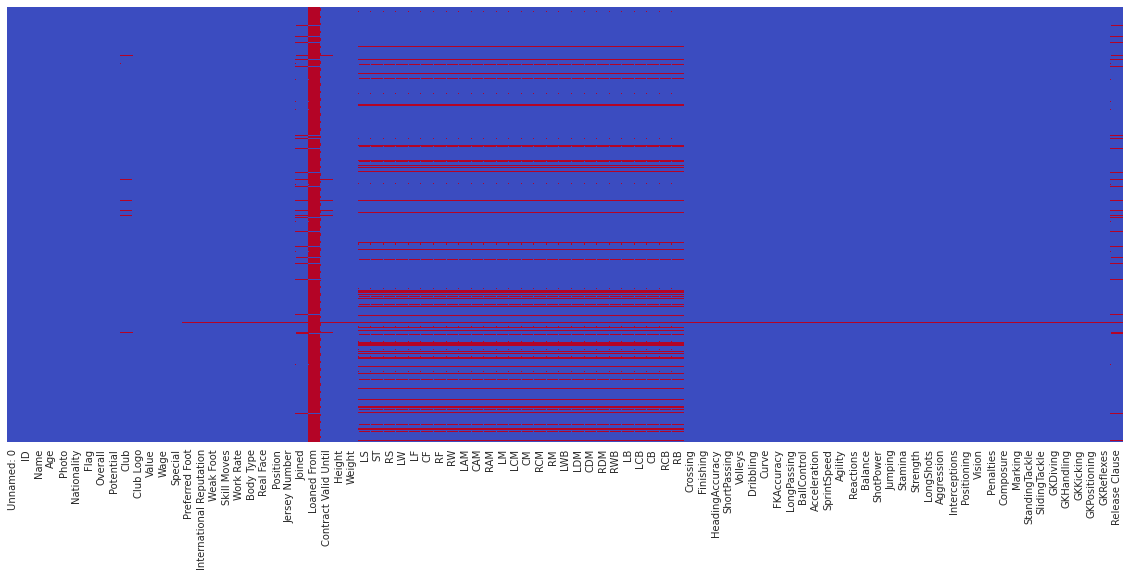

In [0]:
fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(df.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)
plt.show()

In [0]:
df.drop(['Loaned From'],axis=1,inplace=True) # drop the column that marjority if it is NaN
df.drop(['Unnamed: 0','Photo','Flag','Club Logo'],axis=1,inplace=True) # drop repeated index and url columns 

In [0]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioni

In [0]:
unintersted_columns =['ID','Real Face','Body Type','Jersey Number','Joined','Work Rate',
                      'Contract Valid Until','Release Clause']
df.drop(unintersted_columns,axis=1,inplace=True) # drop the columns that are not interested in the exploratory data analysis

In [0]:
df.isnull().sum()[df.isnull().sum()!=0] # print NaN columns with its count

Club                         241
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Position                      60
Height                        48
Weight                        48
LS                          2085
ST                          2085
RS                          2085
LW                          2085
LF                          2085
CF                          2085
RF                          2085
RW                          2085
LAM                         2085
CAM                         2085
RAM                         2085
LM                          2085
LCM                         2085
CM                          2085
RCM                         2085
RM                          2085
LWB                         2085
LDM                         2085
CDM                         2085
RDM                         2085
RWB                         2085
LB                          2085
LCB       

In [0]:
NanCount = df.isnull().sum()[df.isnull().sum()!=0]
col_droprow = NanCount[(NanCount==48)|(NanCount==60)].index.tolist() # columns with only 48 or 60 NaN rows
df.dropna(subset=col_droprow,axis=0,inplace=True) # drop NaN rows of these columns due to really small portion of NaN

In [0]:
df['Club'].fillna('No Club', inplace = True) # fill NaN with 'no club' 

In [0]:
col_notuse = df.isnull().sum()[df.isnull().sum()!=0].index.tolist() 
print(col_notuse) 
# these columns are about potential improvement for each position of every player, 
# which are unnecessary for this project. Thus, it is safe to drop them.

['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']


In [0]:
df_clean = df.drop(col_notuse, axis=1)
df_clean.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,RF,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,ST,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,LW,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,GK,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,RCM,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [0]:
df_clean.shape

(18147, 50)

# Exploratory Data Analysis

In [0]:
def unit_transfomer(value):
    '''
    a function to clean some of values in order to interpret them 
    '''
    try:
        suffix = value[-1]
        value = float(value[1:-1])
        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df_clean['Value'] = df_clean['Value'].apply(unit_transfomer)
df_clean['Wage'] = df_clean['Wage'].apply(unit_transfomer)

In [0]:
print('Most valued player: %s with value: €%s'%(df_clean.iloc[df_clean['Value'].idxmax()][0],df_clean.iloc[df_clean['Value'].idxmax()][6]))
print('Highest earner : %s with wage: €%s'%(df_clean.iloc[df_clean['Wage'].idxmax()][0],df_clean.iloc[df_clean['Wage'].idxmax()][7]))


Most valued player: Neymar Jr with value: €118500000.0
Highest earner : L. Messi with wage: €565000.0


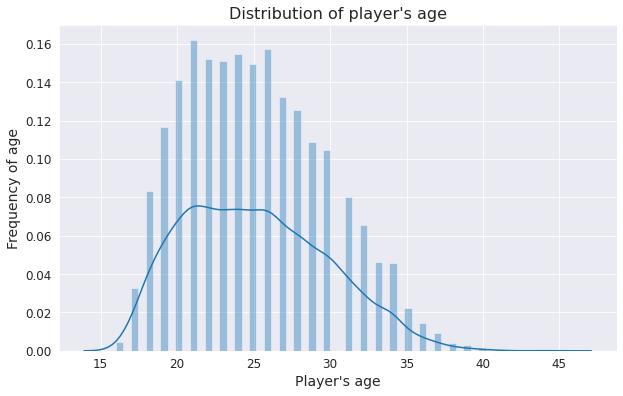

In [0]:
# plot age distribution 
plt.figure(figsize=(10,6))
ax = sns.distplot(df_clean['Age'],bins = 60,kde=True)
ax.set_xlabel(xlabel='Player\'s age', fontsize=14)
ax.set_ylabel(ylabel='Frequency of age', fontsize=14)
ax.set_title(label='Distribution of player\'s age', fontsize=16)
ax.tick_params(labelsize=12)
plt.show()

- Player's age falls in a normal distribution with a majority of age in between 20 and 30. Most of the players were neither too young nor too old, which makes sense in terms of player's golden age of career.

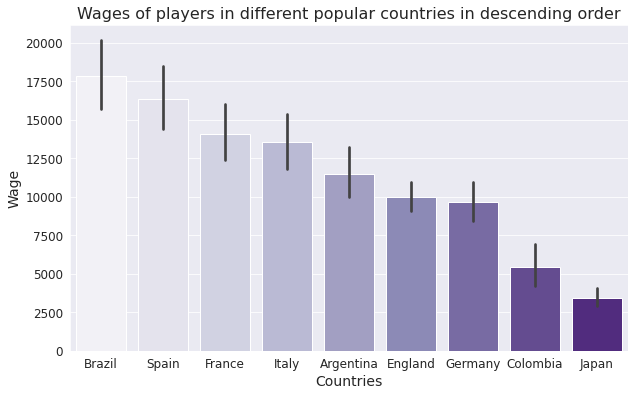

In [0]:
# top 9 countries with the most players
select_country = df_clean['Nationality'].value_counts()[:9].index.tolist()
# sort countries in order of Wage
df_country = df_clean.loc[df_clean['Nationality'].isin(select_country)][['Nationality','Wage']]
index_name = df_country.groupby('Nationality').mean().sort_values('Wage',ascending=False).index.tolist()
df_country_sort = df_country.set_index('Nationality').loc[index_name]
# make bar plot
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df_country_sort.index,y='Wage',data=df_country_sort,palette = 'Purples')
ax.set_xlabel(xlabel = 'Countries', fontsize = 14)
ax.set_ylabel(ylabel = 'Wage', fontsize = 14)
ax.set_title(label = 'Wages of players in different popular countries in descending order', fontsize = 16)
ax.tick_params(labelsize=12)
plt.show()

 - Among these countries with the most football players, players from Brazil were the highest earner. Spain, France and Italy followed behind. It is interesting to see Argentina was not one of the top 3 countries that players earn the most given the fact that Argentina is well-known for football. 

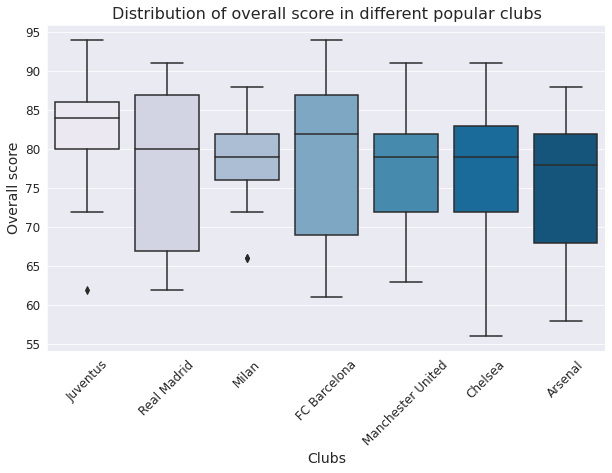

In [0]:
# select some popular clubs
select_clubs = ['Juventus', 'Real Madrid','Manchester United','FC Barcelona','Chelsea','Arsenal','Milan']
df_club = df_clean.loc[df_clean['Club'].isin(select_clubs)][['Club','Overall']]
index_name2 = df_club.groupby('Club').mean().sort_values('Overall',ascending=False).index.tolist()
df_club_sort = df_club.set_index('Club').loc[index_name2]
# make boxplot
plt.figure(figsize=(10,6))
ax = sns.boxplot(x=df_club_sort.index,y='Overall',data=df_club_sort,palette = 'PuBu')
ax.set_xlabel(xlabel = 'Clubs', fontsize = 14)
ax.set_ylabel(ylabel = 'Overall score', fontsize = 14)
ax.set_title(label = 'Distribution of overall score in different popular clubs', fontsize = 16)
ax.tick_params(labelsize=12)
plt.xticks(rotation = 45)
plt.show()

- As shown from the boxplot above, around 50% of players from Juventus have the overall score above 85 and Juventus has the highest least score over all the clubs above, which makes Juventus have the highest average overall score.
- Scores of Real Madrid and FC Barcebona are pretty diverse from 90 plus all the way to nearly 60 probably because these two clubs have more players than other clubs above.

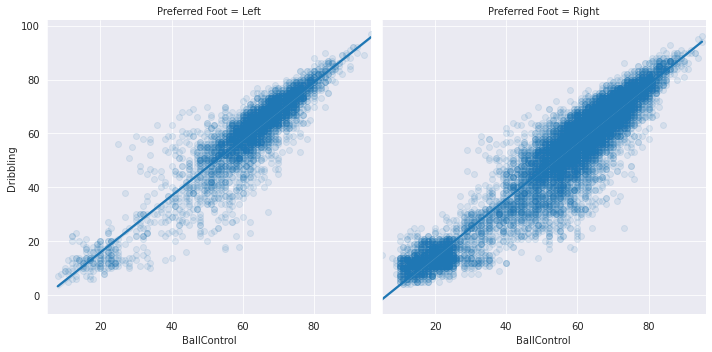

In [0]:
# plot data and regression model fits across a FacetGrid
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df_clean,scatter_kws = {'alpha':0.1},col = 'Preferred Foot')
plt.rcParams.update({'font.size': 15})
# Comparison of performance between left-footed and right-footed players

- It is observed that players with left preferred foot tend to yield better footwork skills becuase higher portion of datapoints concentrate on the region of higher dribbling and ball control socres for left-foot preferred players.

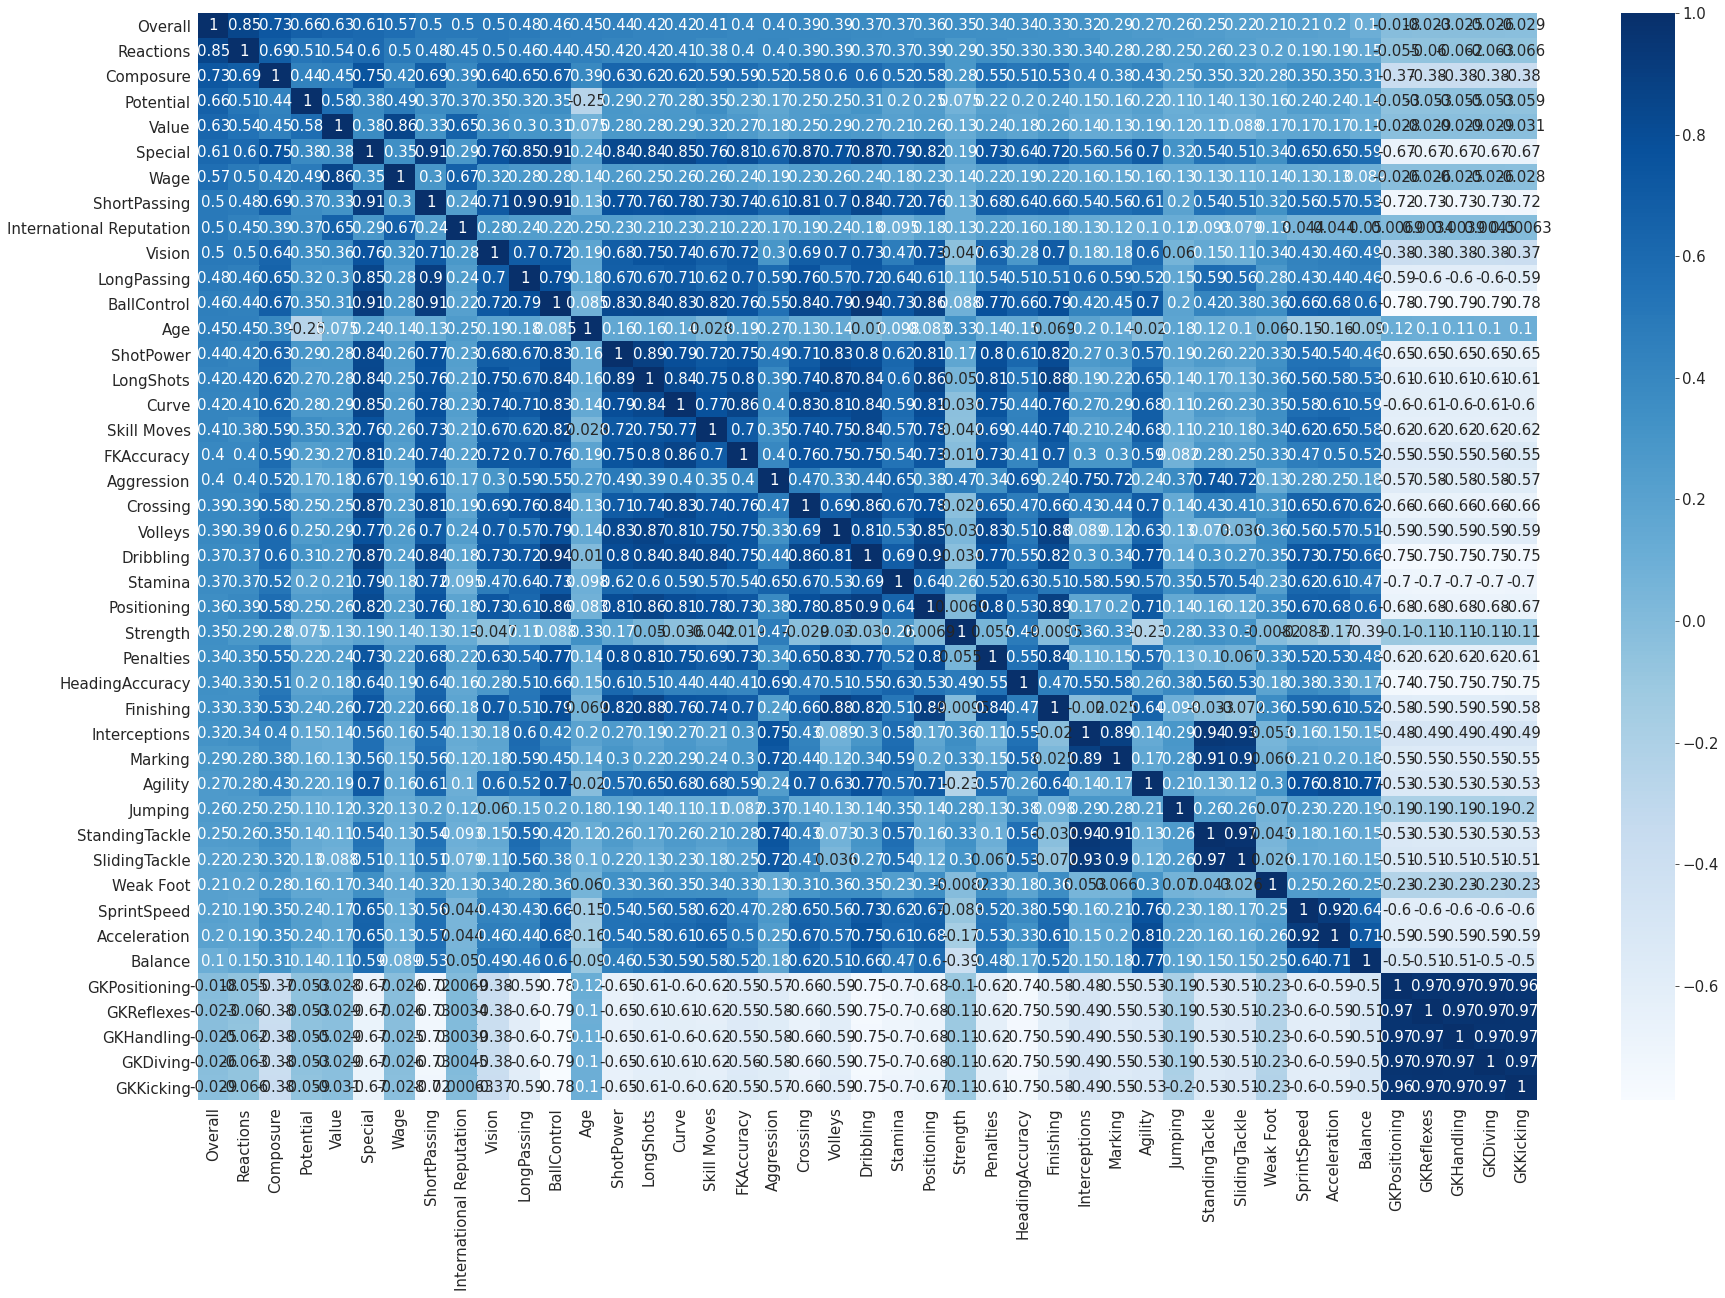

In [0]:
correlation = df_clean.corr(method='pearson')
#Show features in order of correlation coefficient with respect to Overall which is the target variable 
col_name = correlation.nlargest(47, 'Overall')['Overall'].index

plt.figure(figsize=(30,20))
sns.heatmap(df_clean[col_name].corr(),annot=True,cmap='Blues')
plt.show()

- Overall has higher correlations with Reactions, Composure, and Potential.
- Ball control has relatively higher correlation with others abilities, such as ShortPassing, LongShots, Dribbling and Positioning.
- Age has negative correlation with Potential, meaning potential tends to fall as player grows old
- Features with prefix-GK tend to be negatively correlated to other features and highly correlated to GK features.

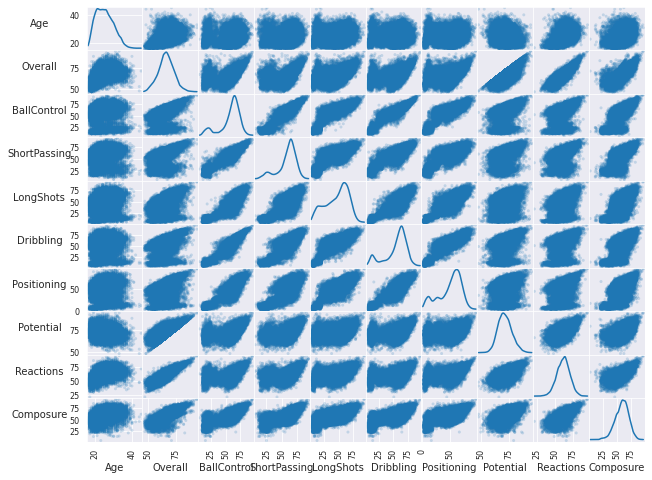

In [0]:
# plot correlations between interesting features found above 
df_corr = df_clean[['Age','Overall','BallControl','ShortPassing','LongShots','Dribbling',
                    'Positioning','Potential','Reactions','Composure']]
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams.update({'font.size': 10})
ax = pd.plotting.scatter_matrix(df_corr, alpha=0.2, diagonal = 'kde');
n = len(df_corr.columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax1 = ax[x, y]
        # to make y axis name horizontal 
        ax1.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax1.yaxis.labelpad = 30
plt.show()

- Visualization of the correlation between each pair of the interested features found in the heatmap.

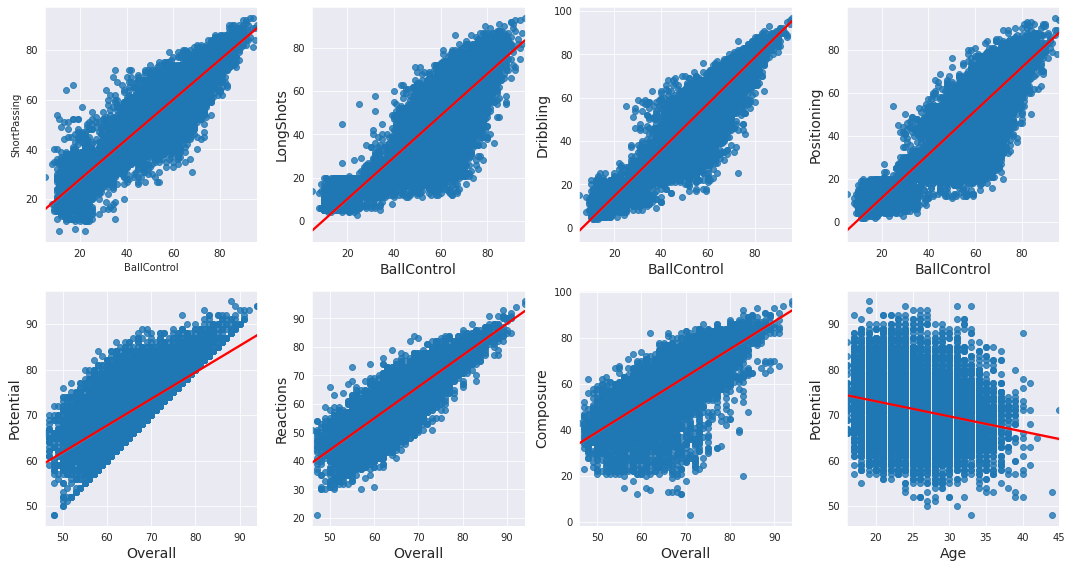

In [0]:
# plot correlation and regression fit between 'BallControl' and others
# plot correlation and regresssion fit between 'Age' and 'Potential'
features = df_corr.columns.tolist()[3:]
features+=['Potential']
plt.figure(figsize = (15, 8))
for index, col in enumerate(features):
    plt.subplot(2, 4, index+1)
    if index+1<5:
        ax = sns.regplot(x = 'BallControl', y = col, data = df_corr,line_kws={'color':'red'})
    elif index+1<8:
        ax = sns.regplot(x = 'Overall', y = col, data = df_corr,line_kws={'color':'red'})
    else:
        ax = sns.regplot(x = 'Age', y = col, data = df_corr,line_kws={'color':'red'})
    plt.rc('axes', labelsize=14)
plt.tight_layout()

- Now we can clearly see the correlation between each pair of features. 
- Age is negatively correlated to Potential and the rest of them are positively correalted one another.
- The collinearity between these features are expected to be visualized by PCA in the following section.

# Unsupervised: PCA

In [0]:
df_pca = df_clean[correlation.nlargest(40, 'Overall')['Overall'].index]# select 40 most correlated features for PCA 
df_pca.drop(columns=['Special','Value','Wage'],inplace=True) # drop uninterested columns 
df_pca.set_index(df_clean['Name'],inplace=True) # set index with player's name

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
sample=pd.concat([df_pca.head(1000),df_pca.tail(1000)],axis=0) # select top and last 1000 samples for better visualization
sample_scaled = StandardScaler().fit_transform(sample) # standarize data

In [0]:
pca = PCA(n_components=2, svd_solver='full')
scores = pca.fit_transform(sample_scaled)

In [0]:
df_scores = pd.DataFrame(data = scores
                         ,columns = ['PC1', 'PC2']
                         ,index = sample.index)
df_scores.head()# store projections in a dataframe 

,PC1,PC2
Name,,
L. Messi,-8.226135,-1.012405
Cristiano Ronaldo,-8.511722,0.459756
Neymar Jr,-7.841980,-1.467220
De Gea,3.684431,4.802699
K. De Bruyne,-8.272295,0.694361


In [0]:
df_loadings = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2']
                           ,index = sample.columns)
df_loadings.head()# store features represented by 2 pc in a dataframe

,PC1,PC2
Overall,-0.155743,0.260342
Reactions,-0.161330,0.230566
Composure,-0.182047,0.155707
Potential,-0.145354,0.213997
ShortPassing,-0.199566,0.025194


In [0]:
def pca_plot(scores,loadings,loading_labels=None,score_labels=None):
    '''
    a function to project datapoints and features with the first two principle components in a 2-D plane 
    
    scores: datapoints 
    loadings: features
    score_labels= datapoints' annotation
    loading_labels= features' annotation
    ''' 
    n = loadings.shape[0]
    
    # adjusting the scores to fit in (-1,1)
    scores_scaled = (1/(df_scores.max(axis=0) - df_scores.min(axis=0)))*df_scores
   
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
    # plot each datapoint with its label 
    for [x,y], label in zip(scores_scaled[['PC1','PC2']].values,score_labels):
        plt.text(x, y, label, ha='center', size=11)
    # plot each feature with arrow 
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'darkblue',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], 'Feature '+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'darkblue', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel('PC 1', fontsize=20);
    plt.ylabel('PC 2', fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid('off')
    return

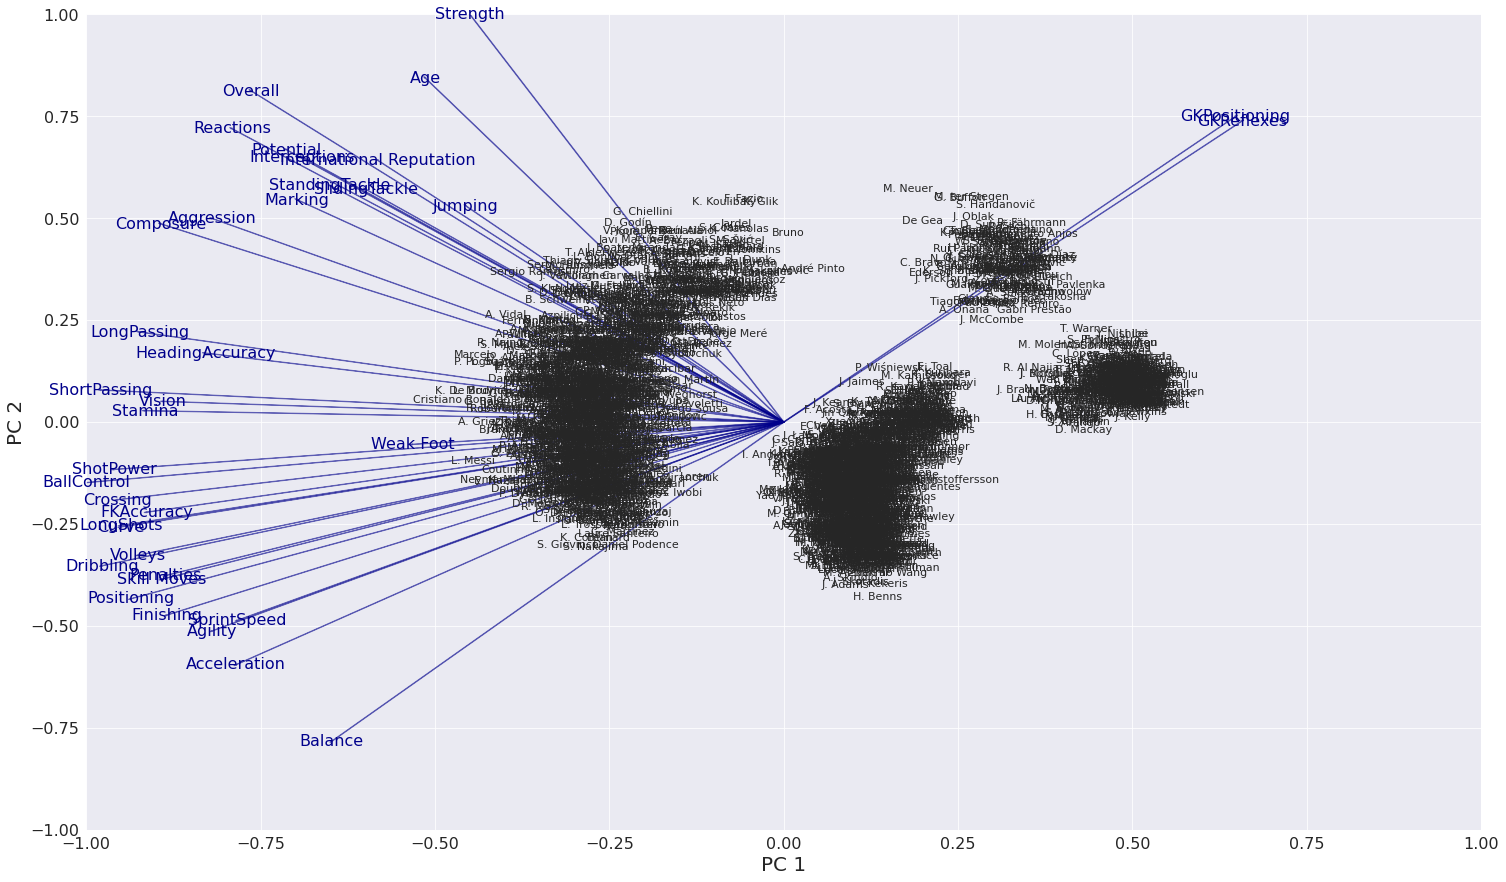

In [0]:
plt.rcParams['figure.figsize'] = (25,15)
pca_plot(df_scores,df_loadings,loading_labels=df_loadings.index,score_labels=sample.index)
# samples annotated by player's name
# features represented by vector arrows 
plt.show()

- It is easily to find that vector 'Overall' (our target) is very closed to vector 'Reaction' and 'Potential' as these three features concentrate together on the left corner, meaning strong correlations in between them. This finding is also justified by the correlation heatmap in the EDA section as Reaction and Potential were among the top 3 most correlated features to Overall.
- Another finding is that the closer the players to feature arrows on the left-side plane, the better the player are, e.g L. Messi and Cristiano Ronaldo are all at the most left side of the plane. The reason behind that is players on the left-hand side plane have scores above the average for each feature on the left-hand side plane. As more far away they are from the origin point to the left, the higher scores they would have for features on the left-side plane.
- We can clearly see that there are four clusters in the projection plane. If we take a look at the Overall as a axis, the cluster falls in the postive direction is the one that contains higher overall score players and the bottom cluster in the negative direction of the overall contains lower overall score players.
- Outliers occur at the upper right cluster. Players in this cluster tend to have higher GKPositioning and GKReflexes scores and are visually away from the feature Overall. It makes sense since features with prefix-GK are all negatively correlated to other features as reported in the heatmap from the EDA section. However, player De Gea from this cluster has pretty high overall score, which is an outlier. Perhaps prefix-GK features are another measurements of player's overall performance but only a few players are good at them.

In [0]:
# try 10 pc
pca10 = PCA(n_components=10, svd_solver='full')
pca10.fit(sample_scaled)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

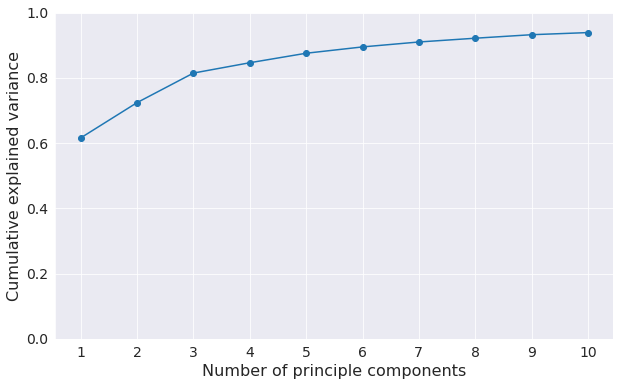

In [0]:
# plot cumulative explained variance
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(range(1,11), np.cumsum(pca10.explained_variance_ratio_),'-o')
plt.xlabel('Number of principle components', fontsize=16)
plt.ylabel('Cumulative explained variance', fontsize=16);
plt.tick_params(labelsize=14)
plt.xticks(range(1,11,1))
plt.ylim(0,1)
plt.show()

- As the plot shown above, as the number of components used to represent the data increases, more amount of variance within the data would be explained. In another word, the data will be reconstructed more completely using more principle components.

# Linear Regression Model 

In [0]:
# convert categorical data into numerical


# turn 'Preferred Foot' into a binary variable
def right_footed(df):
    if (df['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0
    
# create a new varaible to account for all player positions
def simple_position(df):
    if (df['Position'] == 'GK'):
        # category goal keeper position as 1
        return 1
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        # category these defender positions as 2
        return 2
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        # category these defensive midfield positions as 3
        return 3
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM')):
        # category these midfield positions as 4
        return 4
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        # category these attacking midfield positions as 5
        return 5
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        # category these support strikers positions as 6
        return 6
    else:
        return 0 
    
    
# get a count of Nationalities in the Dataset, make of list of those with over 250 Players (our Major Nations)
nat_counts = df_clean.Nationality.value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

# replace Nationality with a binary variable for 'Major Nation'
def major_nation(df):
    if (df.Nationality in nat_list):
        return 1
    else:
        return 0

    
# get a count of Club in the Dataset, make of list of those with over 30 Players (our Major Clubs)
clu_counts = df_clean.Club.value_counts()
clu_list = clu_counts[clu_counts >= 25].index.tolist()

# replace Nationality with a binary variable for 'Major Nation'
def major_club(df):

    if (df.Club in clu_list) and df.Club!='No Club':
        return 1
    else:
        return 0

# change height from foot into inch
def parse_ht(ht):
 
    ht_ = ht.split("'")
    ft_ = float(ht_[0])
    in_ = float(ht_[1].replace("\"",""))
    return (12*ft_) + in_

# remove lbs in Weight variable
def parse_wt(wt):
    return float(wt.replace('lbs',''))

In [0]:
df_clean['Right_Foot'] = df_clean.apply(right_footed, axis=1)
df_clean['Simple_Position'] = df_clean.apply(simple_position,axis = 1)
df_clean['Major_Nation'] = df_clean.apply(major_nation,axis = 1)
df_clean['Major_Club'] = df_clean.apply(major_club,axis = 1)
df_clean['Height'] = df_clean["Height"].apply(lambda x:parse_ht(x))
df_clean['Weight'] = df_clean["Weight"].apply(lambda x:parse_wt(x))

In [0]:
# create the final cleaned data with all numerical data 
df_final=df_clean.select_dtypes(exclude=['object'])

In [0]:
# split target variable from the original dataset
target = df_final.Overall
X = df_final.drop(['Overall'], axis = 1)

# splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3,random_state=2)

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [0]:
# train linear regression model and get root mean square error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions_test = lin_reg.predict(X_test)
predictions_train = lin_reg.predict(X_train)

RMSE_test=np.sqrt(mean_squared_error(y_test, predictions_test))
RMSE_train=np.sqrt(mean_squared_error(y_train, predictions_train))
print('Train set RMSE :', RMSE_train)
print('Test set RMSE :', RMSE_test)

Train set RMSE : 1.7766164529150252
Test set RMSE : 1.828048796228038


## Create a Ridge regression model ( 𝐿2  regularization )

In [0]:
# Generate several possible values for the regularization strength alpha
alphas =np.logspace(-3,2,30)

# Initialize the dataframes to store for all the different values of alphas
Train_Error_L2 = np.zeros(shape=(len(alphas),1))
Test_Error_L2 = np.zeros(shape=(len(alphas),1))
Model_Coeff_L2  = np.zeros(shape=(X.shape[1], len(alphas)))
NonZeroCoeff_L2 = np.zeros(shape=(len(alphas),1))

In [0]:
# Run the Ridge Regression for all different values of alphas 
count = -1
for alpha in alphas:
    count += 1
    # instantiate a logistic regression model, and fit with X and y
    model_L2 = linear_model.Ridge(alpha=alpha)
    # Fit the model
    model_L2.fit(X_train, y_train)
    Train_Error_L2[count,0] = np.sqrt(mean_squared_error(y_train, model_L2.predict(X_train)))
    Test_Error_L2[count,0]  = np.sqrt(mean_squared_error(y_test, model_L2.predict(X_test)))
    Model_Coeff_L2[:,count] = model_L2.coef_
    NonZeroCoeff_L2[count,0] = X.shape[1] - (model_L2.coef_ == 0).sum()

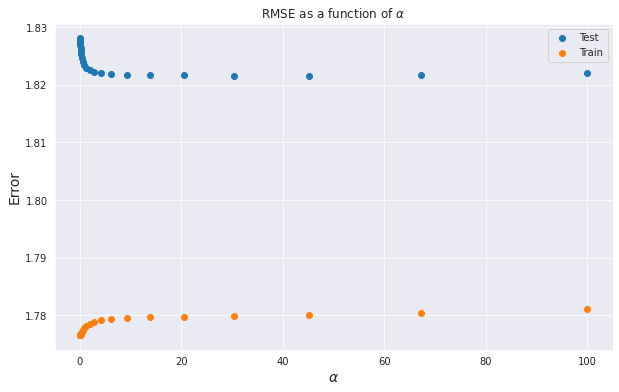

In [0]:
plt.scatter(alphas, Test_Error_L2, label='Test')
plt.scatter(alphas, Train_Error_L2, label='Train')
plt.xlabel(r'$\alpha$')
plt.title(r'RMSE as a function of $\alpha$')
plt.ylabel('Error')
plt.legend()
plt.show()

In [0]:
print('Minimum Train Set RMSE:', round(Train_Error_L2.min(),5))
print('Minimum Test Set RMSE:', round(Test_Error_L2.min(),5))

Minimum Train Set RMSE: 1.77662
Minimum Test Set RMSE: 1.82157


## Create a Lasso regression model ( 𝐿1  regularization )

In [0]:
# Generate several possible values for the regularization strength alpha
alphas =[0.0001,0.0005,0.001,0.005,0.01]

# Initialize the dataframes to store for all the different values of alphas
Train_Error_L1 = np.zeros(shape=(len(alphas),1))
Test_Error_L1 = np.zeros(shape=(len(alphas),1))
Model_Coeff_L1  = np.zeros(shape=(X.shape[1], len(alphas)))
NonZeroCoeff_L1 = np.zeros(shape=(len(alphas),1))

In [0]:
count = -1
for alpha in alphas:
    count += 1
    # instantiate a logistic regression model, and fit with X and y
    model_L1 = linear_model.Lasso(alpha=alpha, max_iter=10000)
    # Fit the model
    model_L1.fit(X_train, y_train)
    Train_Error_L1[count,0] = np.sqrt(mean_squared_error(y_train, model_L1.predict(X_train)))
    Test_Error_L1[count,0]  = np.sqrt(mean_squared_error(y_test, model_L1.predict(X_test)))
    Model_Coeff_L1[:,count] = model_L1.coef_
    NonZeroCoeff_L1[count,0] = X.shape[1] - (model_L1.coef_ == 0).sum()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8195.899647660603, tolerance: 59.96750811683199
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 239.77984857997217, tolerance: 59.96750811683199
  positive)


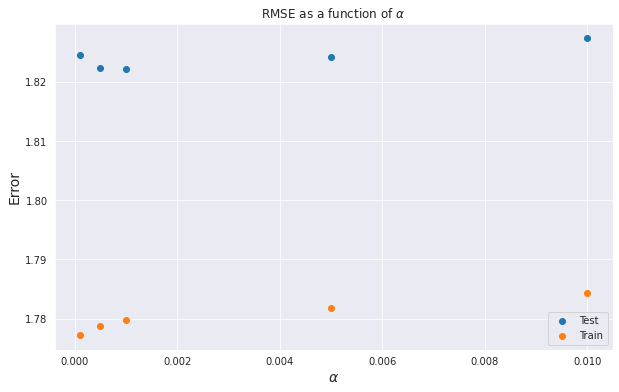

In [0]:
plt.scatter(alphas, Test_Error_L1, label='Test')
plt.scatter(alphas, Train_Error_L1, label='Train')
plt.title(r'RMSE as a function of $\alpha$')
plt.xlabel(r'$\alpha$')
plt.ylabel('Error')
plt.legend()
plt.show()

In [0]:
print('Minimum Train Set  RMSE:', round(Train_Error_L1.min(),5))
print('Minimum Test Set  RMSE:', round(Test_Error_L1.min(),5))

Minimum Train Set  RMSE: 1.77723
Minimum Test Set  RMSE: 1.82212


# Random Forest Model

In [0]:
# Create random forest model
rf = RandomForestRegressor(random_state = 2)

# Number of trees in random forest
n_estimators = [50,100,200]
# Number of features to consider at every split
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {
               'n_estimators':n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 200]}


In [0]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 22.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [0]:
rf_random.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [0]:
# predict with the best parameters and calculate the RMSE
best_random = rf_random.best_estimator_
predictions_test_rf = best_random.predict(X_test)
predictions_train_rf = best_random.predict(X_train)
RMSE_test_rf = np.sqrt(mean_squared_error(y_test, predictions_test_rf))
RMSE_train_rf = np.sqrt(mean_squared_error(y_train, predictions_train_rf))

print('Minimum Train Set RMSE:',RMSE_train_rf)
print('Minimum Test Set RMSE:',RMSE_test_rf)

Minimum Train Set RMSE: 0.16739088196367977
Minimum Test Set RMSE: 1.3438728897418366


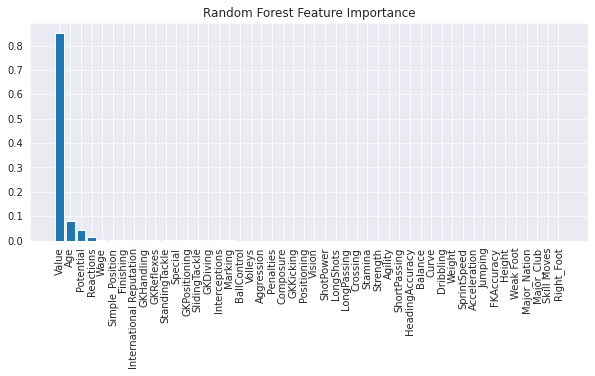

In [0]:
# Calculate feature importances
importances = best_random.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X.columns [i] for i in indices]

# Create plot
plt.figure(figsize=(10,4))
# Create plot title
plt.title("Random Forest Feature Importance")
# Add bars
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

# XGBoost Model

In [0]:
# Initialize XGB clssifier
xgb=XGBRegressor(objective='reg:squarederror')

In [0]:
# Hyperparameters that need to be tuned. Many of them are similar to the ones with Random Forest model. 
params= {
            "learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ], # Boosting learning rate (xgb’s “eta”).
            "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15,30,50,100,None], # Maximum tree depth for base learners.
            "min_child_weight" : [ 1, 3, 5, 7 ], # Minimum sum of instance weight(hessian) needed in a child.
            "gamma" : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ], # Minimum loss reduction required to make a further partition on a leaf node of the tree.
            "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] # Subsample ratio of columns when constructing each tree.
        }

In [0]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=2, n_jobs = -1)

In [0]:
# Modeling fitting
xgb_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=0, reg_...
                                          verbosity=1),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0

In [0]:
# Display the best parameters for XGBoosting
xgb_random.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.3,
 'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 7}

In [0]:
# predict with the best parameters and calculate the RMSE
best_random_xgb = xgb_random.best_estimator_
predictions_test_xgb = best_random_xgb.predict(X_test)
predictions_train_xgb = best_random_xgb.predict(X_train)
RMSE_test_xgb = np.sqrt(mean_squared_error(y_test, predictions_test_xgb))
RMSE_train_xgb = np.sqrt(mean_squared_error(y_train, predictions_train_xgb))

print('Minimum Train Set RMSE:',RMSE_train_xgb)
print('Minimum Test Set RMSE:',RMSE_test_xgb)

Minimum Train Set RMSE: 0.285047709748321
Minimum Test Set RMSE: 1.1999993009632568


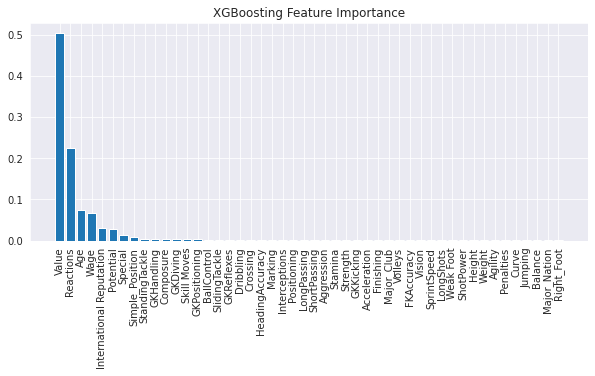

In [0]:
# Calculate feature importances
importances = best_random_xgb.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X.columns [i] for i in indices]

# Create plot
plt.figure(figsize=(10,4))
# Create plot title
plt.title("XGBoosting Feature Importance")
# Add bars
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

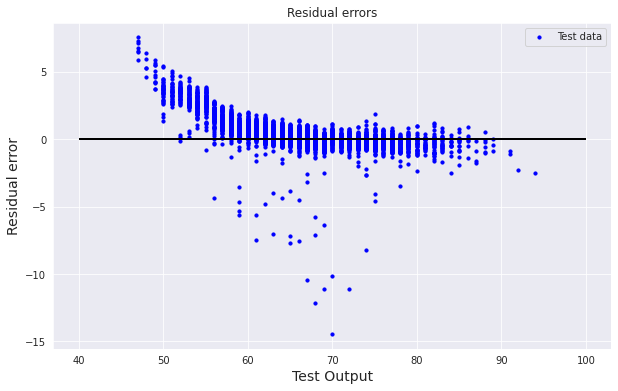

In [0]:
# Addtional plot to visualize error
error = predictions_test_xgb-y_test
plt.scatter(y_test, error, color = 'blue', s = 10, label = 'Test data')
plt.hlines(y=0, xmin=40, xmax=100, linewidth=2)
plt.xlabel('Test Output')
plt.ylabel('Residual error')
plt.legend(loc = 'upper right')
plt.title('Residual errors')
plt.show()

Text(27.125, 0.5, 'Residual error')

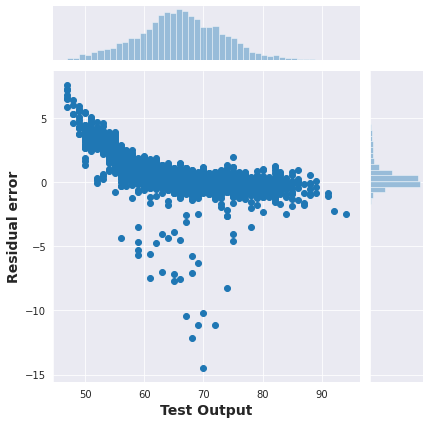

In [0]:
# Check the distribution of test data and associated errors as well
h= sns.jointplot(x=y_test, y=error, kind="scatter");
h.ax_joint.set_xlabel('Test Output', fontweight='bold')
h.ax_joint.set_ylabel('Residual error', fontweight='bold')

# Models Comparison

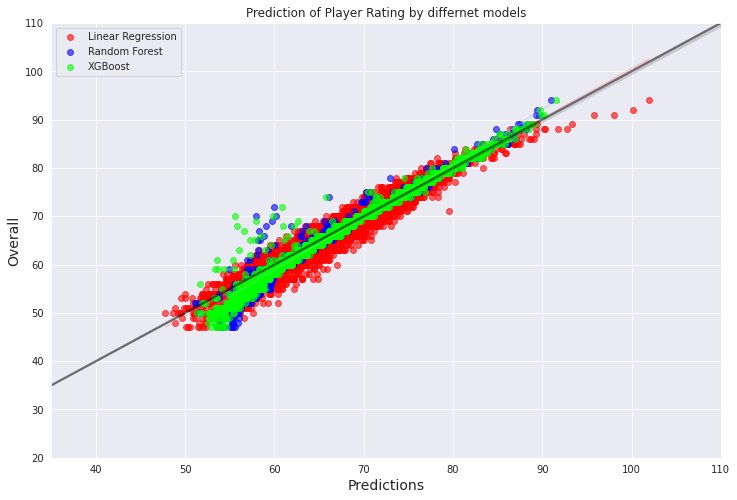

In [0]:
#Visualising the results
plt.figure(figsize=(12,8))
sns.regplot(predictions_test,y_test,scatter_kws={'alpha':0.6,'color':'red'},line_kws={'color':'red','alpha':0.005},label='Linear Regression')
sns.regplot(predictions_test_rf,y_test,scatter_kws={'alpha':0.6,'color':'blue'},line_kws={'color':'blue','alpha':0.005},label='Random Forest')
sns.regplot(predictions_test_xgb,y_test,scatter_kws={'alpha':0.6,'color':'lime'},line_kws={'color':'lime','alpha':0.005},label='XGBoost')
sns.regplot([10,150],[10,150],scatter_kws={'alpha':0.8,'color':'black'},line_kws={'color':'black','alpha':0.5})

plt.xlim(35,110)
plt.ylim(20,110)
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Prediction of Player Rating by differnet models")
plt.legend()
plt.show()

Graph above demonstrates how well each model predicts the result. A quantitative comparison of results are given below.

In [0]:
#Summarized RMSE and R2 scores
linear_error=Test_Error_L1.min()
rf_error=RMSE_test_rf
xgb_error=RMSE_test_xgb

linear_r2=r2_score(y_test, predictions_test)
rf_r2=r2_score(y_test, predictions_test_rf)
xgb_r2=r2_score(y_test, predictions_test_xgb)

RMSE=[linear_error,rf_error,xgb_error]
r2=[linear_r2,rf_r2,xgb_r2]

index_name=['Linear Regression','Random Forest','XGBoost']

# Create Dataframe for the results table for better visualization later
RMSE=pd.Series(RMSE,name='RMSE',index=index_name)
r2=pd.Series(r2,name='R2',index=index_name)

result=pd.concat([RMSE,r2],axis=1)
result

,RMSE,R2
Linear Regression,1.822118,0.931985
Random Forest,1.343873,0.963243
XGBoost,1.199999,0.970692


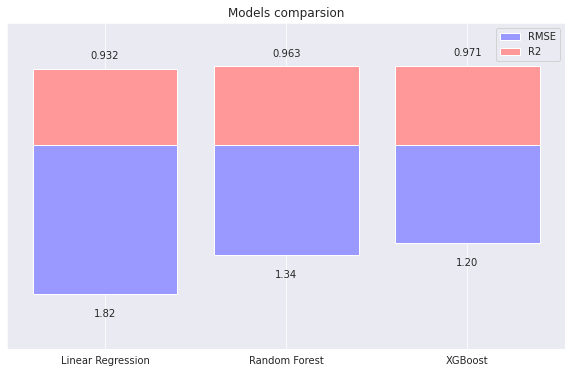

In [0]:
# Visualization of evaluation metrics for all models 
fig, ax = plt.subplots()
ax.bar(result.index.values, -result.RMSE, facecolor='#9999ff', edgecolor='white')
ax.bar(result.index.values, result.R2, facecolor='#ff9999', edgecolor='white')

for x,y in zip(result.index.values, result.RMSE):
    ax.text(x, -y-0.3, '%.2f' % y , ha='center', va= 'bottom')
for x,y in zip(result.index.values, result.R2):
    ax.text(x, y+0.1, '%.3f' % y, ha='center', va= 'bottom')

ax.set_ylim(-2.5,1.5)
ax.get_yaxis().set_visible(False)
ax.legend(('RMSE','R2'),loc=0)
plt.title('Models comparsion')
plt.show()

In general, the model with higher R2 score and lower RMSE is the one that will be chosen in prediction. Therefore, Random Forest model performs the best in this case. <br> <br>
Linear regression model performs relatively worse than tree based model due to its collinearity between certain features. XGBoosting is performing better because XGBoosting has proven to push the limits of computing power for boosted trees algorithms as it was built and developed for the sole purpose of model performance and computational speed.

# Additional analysis

Check if the current model can be improved by increasing the complexity of the model. To be more precise, different degrees of polynomial will be applied for features with the help of PolynomialFeatures class from sklearn.preprocessing. This library generates features for higher polynomial degrees: e.g., for 2 degrees, it will generate a  𝑥2  term for all features. 

In [0]:
# Due to the reason of limited computation power, less data will be used to generate plot in this step.
# Use the original random state to split the original data in the same method as before 
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3,random_state=2)
# Only use top 8 features with randomly selected samples to draw plot 
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train[names[:8]], y_train, test_size=0.95,random_state=2)

In [0]:
# The degree step to use
steps = np.arange(1,12,1)

# Storage vectors to store the training and testing accuracy and error
trainErr = np.zeros(steps.shape)
testErr = np.zeros(steps.shape)

for i, step in enumerate(steps):
    # Generate polynomial features
    poly = PolynomialFeatures(step)
    pX_train = poly.fit_transform(X_train_)
    pX_test = poly.transform(X_test_)
    
    # Scale data: combat numerical instability
    #scaler = StandardScaler()
    #pX_train = scaler.fit_transform(pX_train)
    #pX_test = scaler.transform(pX_test)    
    
    # Create model instance
    model = best_random_xgb

    # Train model
    model.fit(pX_train, y_train_)
    
    # Make Predictions
    y_train_pred = model.predict(pX_train)
    y_test_pred = model.predict(pX_test)
     
    # Calculate Error
    trainErr[i] = np.sqrt(mean_squared_error(y_train_, y_train_pred))
    testErr[i] = np.sqrt(mean_squared_error(y_test_, y_test_pred))
    print('Finsihed step {}.'.format(step))

Finsihed step 1.
Finsihed step 2.
Finsihed step 3.
Finsihed step 4.
Finsihed step 5.
Finsihed step 6.
Finsihed step 7.
Finsihed step 8.
Finsihed step 9.
Finsihed step 10.
Finsihed step 11.


Plot the error.

(1.0, 10.0)

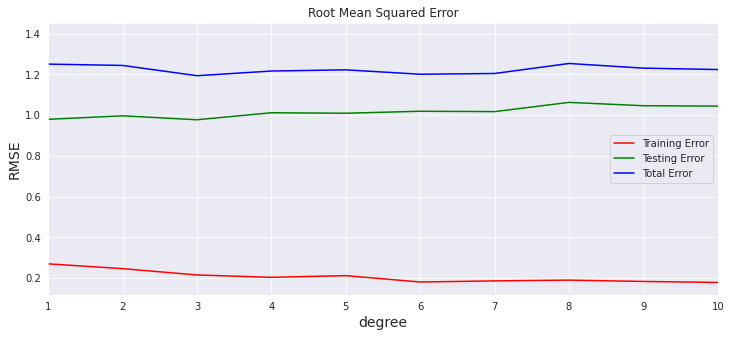

In [0]:
plt.figure(figsize=(12,5))

plt.plot(trainErr,'r',label='Training Error')
plt.plot(testErr,'g',label='Testing Error')
plt.plot(trainErr + testErr, 'b', label='Total Error')

test_loss_min = testErr.min()
deg_min = testErr.argmin() + steps[0]

plt.title("Root Mean Squared Error")
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.legend()
plt.xlim(1,steps[-2])

From the graph above, it indicates that RMSE has been fluctuated over a small range as the polynomial degree of feature increasing. In another word, increasing model complexity with this method would not give much improvement considering the computational cost associated with it. Therefore, power of one will be used in this model.

In [0]:
# Example of increasing model complexity by changing number of trees
n_estimators=[3,5,10,15,20,25,30,50,100,150]
rf_err=[]
xgb_err=[]
for number_tree in n_estimators:
    rf_eg=rf = RandomForestRegressor(random_state = 2,n_estimators=number_tree)
    xgb_eg=xgb=XGBRegressor(objective='reg:squarederror',n_estimators=number_tree)
    
    rf_eg.fit(X_train,y_train)
    xgb_eg.fit(X_train,y_train)
    
    predictions_rf = rf_eg.predict(X_test)
    predictions_xgb = xgb_eg.predict(X_test)
    rf_err.append(np.sqrt(mean_squared_error(y_test, predictions_rf)))
    xgb_err.append(np.sqrt(mean_squared_error(y_test, predictions_xgb)))

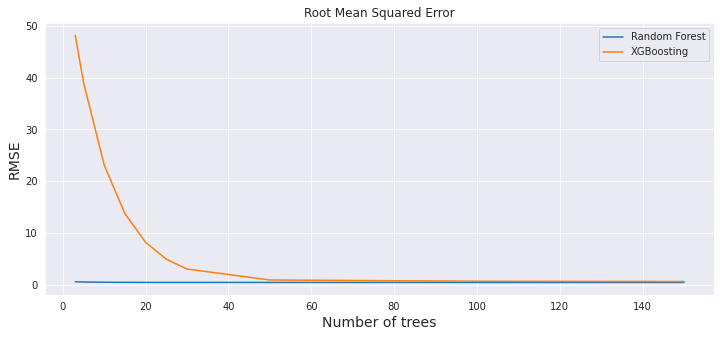

In [0]:
plt.figure(figsize=(12,5))

plt.plot(n_estimators,rf_err, label='Random Forest')
plt.plot(n_estimators,xgb_err, label='XGBoosting')

plt.title("Root Mean Squared Error")
plt.xlabel("Number of trees")
plt.ylabel("RMSE")
plt.legend()

In [0]:
# Example of increasing model complexity by changing maximum number of depth
max_depth_ls = [int(x) for x in np.linspace(5, 100, num = 10)]
#max_depth_ls.append('None')
rf_err2=[]
xgb_err2=[]
for depth in max_depth_ls:
    rf_eg=rf = RandomForestRegressor(max_depth=depth)
    xgb_eg=xgb=XGBRegressor(objective='reg:squarederror',max_depth=depth)
    
    rf_eg.fit(X_train,y_train)
    xgb_eg.fit(X_train,y_train)
    
    predictions_rf = rf_eg.predict(X_test)
    predictions_xgb = xgb_eg.predict(X_test)
    rf_err2.append(np.sqrt(mean_squared_error(y_test, predictions_rf)))
    xgb_err2.append(np.sqrt(mean_squared_error(y_test, predictions_xgb)))

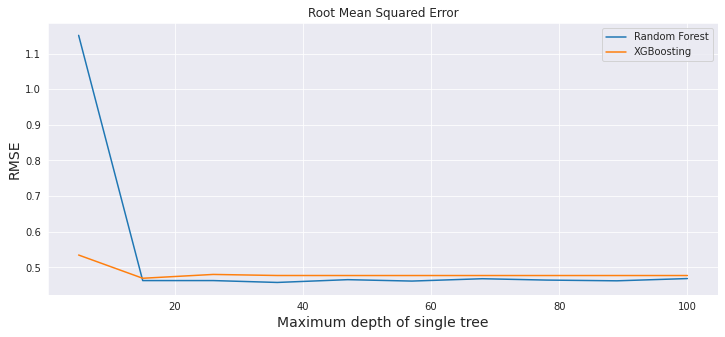

In [0]:
plt.figure(figsize=(12,5))

plt.plot(max_depth_ls,rf_err2, label='Random Forest')
plt.plot(max_depth_ls,xgb_err2, label='XGBoosting')

plt.title("Root Mean Squared Error")
plt.xlabel("Maximum depth of single tree")
plt.ylabel("RMSE")
plt.legend()

Reduce overfitting of XGBoost by finding the elbow point of test error. In another word, in order to avoid overfitting, find the lowest point in the plot in terms of test error for different hyperparameters. Here are some examples below. 


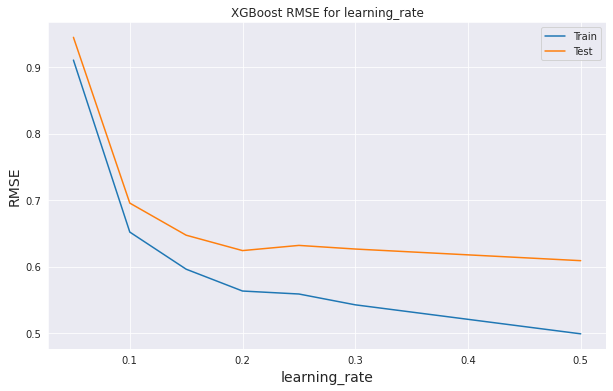

In [0]:
# Balancing bias and variance by adjusting learning rate
learning_rate=[0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.5]
train_err=[]
test_err=[]
for value in learning_rate:
    model = XGBRegressor(objective='reg:squarederror',learning_rate=value)
    model.fit(X_train, y_train)
    predictions_test= model.predict(X_test)
    predictions_train = model.predict(X_train)
    RMSE_test= np.sqrt(mean_squared_error(y_test, predictions_test))
    RMSE_train= np.sqrt(mean_squared_error(y_train, predictions_train))
    test_err.append(RMSE_test)
    train_err.append(RMSE_train)
plt.plot(learning_rate, train_err, label='Train')
plt.plot(learning_rate, test_err, label='Test')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('{}'.format('learning_rate'))
plt.title('XGBoost RMSE for {}'.format('learning_rate'))
plt.show()

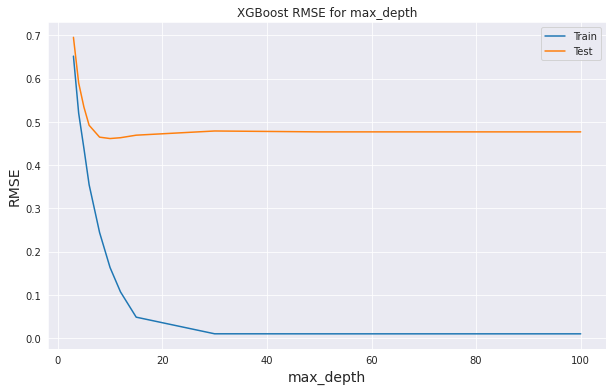

In [0]:
# Balancing bias and variance by adjusting max depth
max_depth=[ 3, 4, 5, 6, 8, 10, 12,15,30,50,100]
train_err=[]
test_err=[]
for value in max_depth:
    model = XGBRegressor(objective='reg:squarederror',max_depth=value)
    model.fit(X_train, y_train)
    predictions_test= model.predict(X_test)
    predictions_train = model.predict(X_train)
    RMSE_test= np.sqrt(mean_squared_error(y_test, predictions_test))
    RMSE_train= np.sqrt(mean_squared_error(y_train, predictions_train))
    test_err.append(RMSE_test)
    train_err.append(RMSE_train)
plt.plot(max_depth, train_err, label='Train')
plt.plot(max_depth, test_err, label='Test')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('{}'.format('max_depth'))
plt.title('XGBoost RMSE for {}'.format('max_depth'))
plt.show()